In [1]:
%matplotlib inline

In [2]:
!tree

.
├── 01-extract_synthesis_inputs.ipynb
├── 02-synthesize_single_neuron.ipynb
├── README.md
├── assets
│   ├── BBP-NeuroTS.jpg
│   └── napari_skimage_cells3d.png
├── data
│   ├── IN_distr.json
│   ├── IN_params.json
│   ├── PC_distr.json
│   ├── PC_params.json
│   ├── bio_distr.json
│   ├── bio_params.json
│   └── neurons
│       ├── C220197A-P2.h5
│       └── Fluo55_left.h5
├── environment_neurots.yml
└── results
    ├── results_extract_synthesis_inputs
    │   ├── Figure.png
    │   ├── generated_cell.asc
    │   ├── generated_cell.h5
    │   ├── generated_cell.swc
    │   ├── test_distr.json
    │   └── test_params.json
    └── results_single_neuron
        ├── generated_cell.asc
        ├── generated_cell.h5
        └── generated_cell.swc

6 directories, 23 files



# Extract inputs for synthesis

This example shows how to extract the inputs required for synthesis from a set of existing
morphologies.


In [3]:
import json
from pathlib import Path

import neurots
from neurots import extract_input


def run(output_dir, data_dir):
    """Run the example for extracting inputs for synthesis."""
    # Generate distribution from directory of neurons
    distr = extract_input.distributions(
        data_dir / "neurons", feature="path_distances", diameter_model="default"
    )

    # Save distributions in a json file
    with open(output_dir / "test_distr.json", "w", encoding="utf-8") as f:
        json.dump(distr, f, sort_keys=True, indent=2)

    # Generate default parameters for topological synthesis of basal dendrites
    params = extract_input.parameters(
        neurite_types=["basal"], feature="path_distances", method="tmd"
    )

    # Save parameters in a json file
    with open(output_dir / "test_params.json", "w", encoding="utf-8") as f:
        json.dump(params, f, sort_keys=True, indent=2)

    # Re-load data from saved distributions
    with open(output_dir / "test_distr.json", "r", encoding="utf-8") as F:
        distr = json.load(F)

    # Re-load data from saved parameters
    with open(output_dir / "test_params.json", "r", encoding="utf-8") as F:
        params = json.load(F)

    # Initialize a neuron
    N = neurots.NeuronGrower(input_distributions=distr, input_parameters=params)

    # Grow the neuron
    neuron = N.grow()

    # Export the synthesized cell
    neuron.write(output_dir / "generated_cell.asc")
    neuron.write(output_dir / "generated_cell.swc")
    neuron.write(output_dir / "generated_cell.h5")


if __name__ == "__main__":
    result_dir = Path("results/results_extract_synthesis_inputs")
    result_dir.mkdir(parents=True, exist_ok=True)

    run(result_dir, Path("data"))

No diametrizer provided, so neurons will have default diameters.


## Blue Brain – NeuroM
NeuroM is a Python-based toolkit for the analysis and processing of neuron morphologies

- 
- https://pythonhosted.org/neurom
- https://neurom.readthedocs.io/en/latest/tutorial.html

In [4]:
!neurom stats --help 

Usage: neurom stats [OPTIONS] [DATAPATH]

  Cli for apps/morph_stats.

Options:
  -C, --config FILE               Configuration File  [default:
                                  /Users/arvid/opt/anaconda3/envs/neurots-
                                  explore/lib/python3.9/site-packages/neurom/a
                                  pps/config/morph_stats.yaml]
  -o, --output FILE               Path to output file, if it ends in .json, a
                                  json file is created,otherwise a csv file is
                                  created
  -f, --full-config               If passed then --config is ignored. Compute
                                  statistics for all neuritetypes, all modes
                                  and all features
  --as-population                 If enabled the directory is treated as a
                                  population
  -I, --ignored-exceptions [SomaError]
                                  Exception to ignore
  --help             

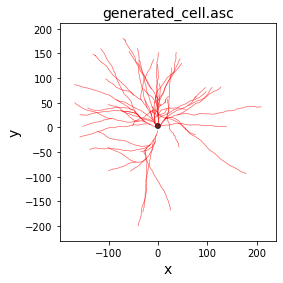

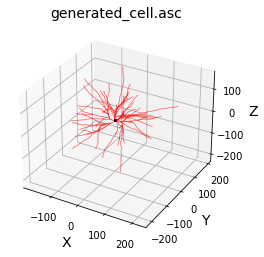

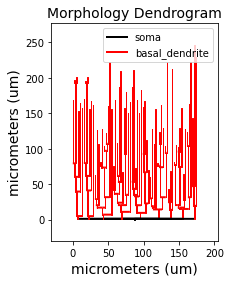

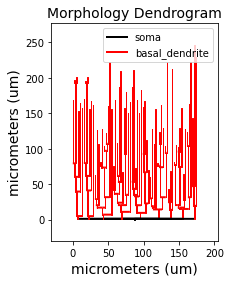

In [5]:
import neurom as nm

# instead of: from neurom import viewer
from neurom.view import matplotlib_impl, matplotlib_utils
m = nm.load_morphology('results/results_extract_synthesis_inputs/generated_cell.asc')

# instead of: viewer.draw(m)
matplotlib_impl.plot_morph(m)

# instead of: viewer.draw(m, mode='3d')
matplotlib_impl.plot_morph3d(m)

# instead of: viewer.draw(m, mode='dendrogram')
matplotlib_impl.plot_dendrogram(m)

# If you used ``output_path`` with any of functions above then the solution is:
fig, ax = matplotlib_utils.get_figure()
matplotlib_impl.plot_dendrogram(m, ax)
matplotlib_utils.plot_style(fig=fig, ax=ax)
matplotlib_utils.save_plot(fig=fig, output_path='results/results_extract_synthesis_inputs')
# for other plots like `plot_morph` it is the same, you just need to call `plot_morph` instead
# of `plot_dendrogram`.

# instead of `plotly.draw`
#from neurom import plotly_impl
#plotly_impl.plot_morph(m)  # for 2d
#plotly_impl.plot_morph3d(m)  # for 3d


In [6]:
m

Morphology <soma: SomaSimpleContour(array([[-5.976617  ,  1.5464652 ,  0.        ,  0.        ],
       [-0.8489594 , -6.317614  ,  0.        ,  0.        ],
       [ 3.8502424 ,  3.6521807 ,  0.        ,  0.        ],
       [ 3.9649937 ,  4.033786  ,  0.        ,  0.        ],
       [ 2.2715461 ,  5.9776726 ,  0.        ,  0.        ],
       [ 0.49562633,  6.287358  ,  0.        ,  0.        ],
       [-3.9634342 ,  4.998472  ,  0.        ,  0.        ]],
      dtype=float32)) <center: [-0.02951458  2.8826172   0.        ], radius: 5.0304246>, n_neurites: 9>

## napari - multi-dimensional image viewer for python

- https://github.com/napari/napari
- https://www.napari-hub.org/

In [7]:
from skimage import data
import napari

viewer = napari.view_image(data.cells3d(), channel_axis=1, ndisplay=3)

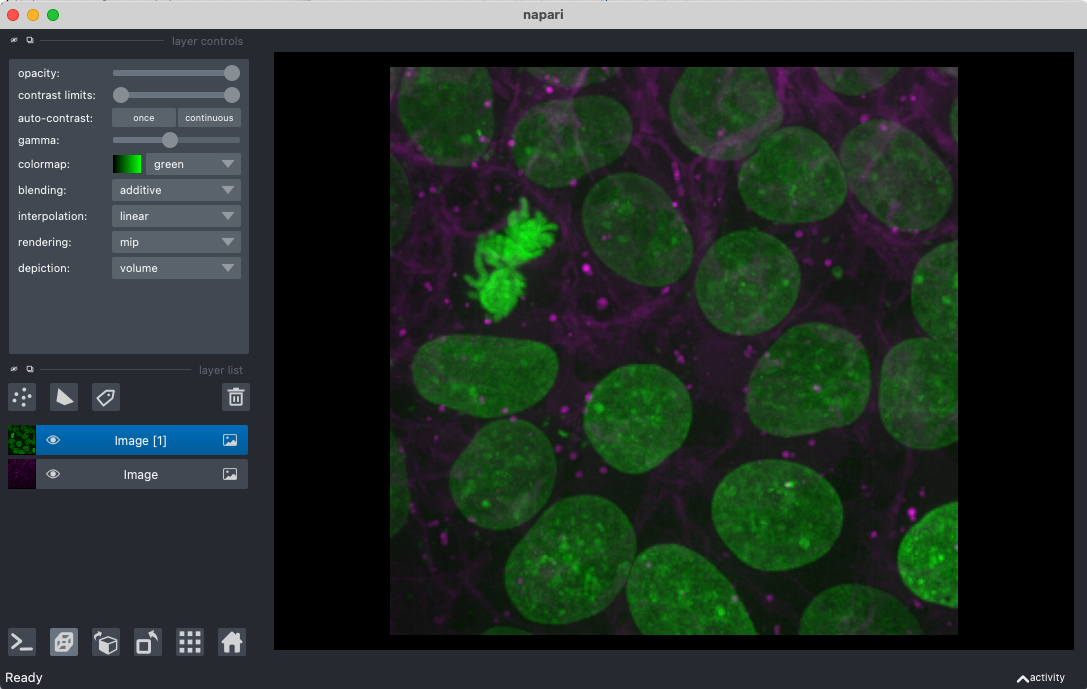

In [8]:
from IPython.display import Image
Image(filename='./assets/napari_skimage_cells3d.png', width=900)

## Brainlit
- http://brainlit.neurodata.io/readme
- https://github.com/neurodata/brainlit
- http://brainlit.neurodata.io/notebooks/visualization/loading.html

In [9]:
# ...

### Display swc files:

https://github.com/napari/napari/issues/693

https://pythonhosted.org/neurom/index.html

https://github.com/BlueBrain/NeuroM

`pip install neurom`

```
import numpy as np
from neurom.io import swc
import napari

data = swc.read('results/results_extract_synthesis_inputs/generated_cell.swc').data_block
# data = nm.load_morphology('results/results_extract_synthesis_inputs/generated_cell.swc')

def parse_swc(data):
    break_points = [0] + list(np.nonzero(np.diff(data[:, 6]) < 0)[0]+1) + [len(data)-1]
    paths = []
    for i in range(len(break_points)-1):
        if break_points[i+1] - break_points[i] > 2:
            paths.append(data[break_points[i]:break_points[i+1], :3])
    return paths

paths = parse_swc(data)
napari.view_shapes(paths, shape_type='path', edge_color='blue', ndisplay=3)
```
